In [1]:
import anndata as ad
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import seaborn as sns
import matplotlib.colors as mcolors

In [3]:
pd.read_csv('./RNA/B03903E6.tissue.gem', sep='\t', comment='#')


,geneID,x,y,MIDCount,ExonCount
0,AC168977.1,9081,13687,2,2
1,AC168977.1,7488,19124,3,3
2,AC168977.1,14093,18683,3,3
3,AC168977.1,8666,20179,2,2
4,AC168977.1,10320,19633,2,2
...,...,...,...,...,...
49036482,Gm42418,10464,13668,2,2
49036483,Gm42418,11448,14779,2,2
49036484,Gm42418,7682,14525,1,1
49036485,Gm42418,12077,16712,1,1


In [2]:
!sshpass -p wang2024 ssh wpy@172.16.10.103 "mamba run -n gsea python ~/stereoseq/20240502-SPACseq/enrich.py"

Gene               object
Log2FoldChange    float64
padj              float64
score             float64
Cluster             int64
dtype: object
/home/wpy/stereoseq/20240502-SPACseq/bin/go-basic.obo: fmt(1.2) rel(2024-04-24) 45,667 Terms
Enrichment analysis for list 0 completed successfully: 675
Enrichment analysis for list 1 completed successfully: 461
Enrichment analysis for list 2 completed successfully: 1176
Enrichment analysis for list 3 completed successfully: 1008
Enrichment analysis for list 4 completed successfully: 1173



In [5]:
for i in [0, 2, 3, 4, 6]:
    enr = pd.read_csv(f"~/stereoseq/20240502-SPACseq/GO/Cluster_{i}.result", sep="\t")
    results = enr.sort_values(by='Combined Score', ascending=False)
    results = results[results["Adjusted P-value"] < 0.1]
    results = results.loc[:, ["Term", "Genes", "Adjusted P-value"]]
    results["Cluster"] = i
    results["Gene Counts"] = results["Genes"].str.split(";").apply(len)
    results["Term"] = results["Term"].str.split("R-HSA").str[0]
    results = results.groupby("Cluster", as_index=False).apply(lambda x: x.sort_values(by='Adjusted P-value')).reset_index(drop=True)
    if not i: go_df = results
    else: go_df = pd.concat([go_df, results], axis=0)
#go_df.to_csv('~/stereoseq/20240502-SPACseq/GO/Reactome.csv', index=None, sep='\t')
go_df

/tmp/ipykernel_10993/3708779311.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = results.groupby("Cluster", as_index=False).apply(lambda x: x.sort_values(by='Adjusted P-value')).reset_index(drop=True)
/tmp/ipykernel_10993/3708779311.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = results.groupby("Cluster", as_index=False).apply(lambda x: x.sort_values(by='Adjusted P-value')).reset

,Term,Genes,Adjusted P-value,Cluster,Gene Counts
0,Striated Muscle Contraction,MYBPC1;MYBPC2;DES;ACTN3;MYL1;TPM2;TNNC2;TPM1;T...,5.301969e-22,0,12
1,Muscle Contraction,RYR1;MYBPC1;MYBPC2;ACTN3;TPM2;TPM1;TNNC2;NEB;A...,7.789969e-19,0,16
2,Muscle Contraction (GO:0006936),RYR1;TPM2;TPM1;PGAM2;KLHL41;TRDN;TTN;MYH1;DES;...,3.487166e-17,0,13
3,Striated Muscle Contraction (GO:0006941),RYR1;TPM1;TNNC2;PGAM2;TNNT3;TCAP;TNNI2;ATP1A2;...,3.555396e-14,0,10
4,Myofibril Assembly (GO:0030239),TPM1;TNNT3;TCAP;CASQ1;KLHL41;TTN,2.547826e-07,0,6
...,...,...,...,...,...
309,Eye Morphogenesis (GO:0048592),FBN2;TENM3,9.880114e-02,6,2
310,Telomere Maintenance Via Telomerase (GO:0007004),PIF1;DKC1,9.880114e-02,6,2
311,Regulation Of Centriole Replication (GO:0046599),PLK4;SASS6,9.880114e-02,6,2
312,RNA-templated DNA Biosynthetic Process (GO:000...,PIF1;DKC1,9.880114e-02,6,2


/tmp/ipykernel_10993/4059176443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/tmp/ipykernel_10993/4059176443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/tmp/ipykernel_10993/4059176443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/tmp/ipykernel_10993/4059176443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/tmp/ipykernel_1

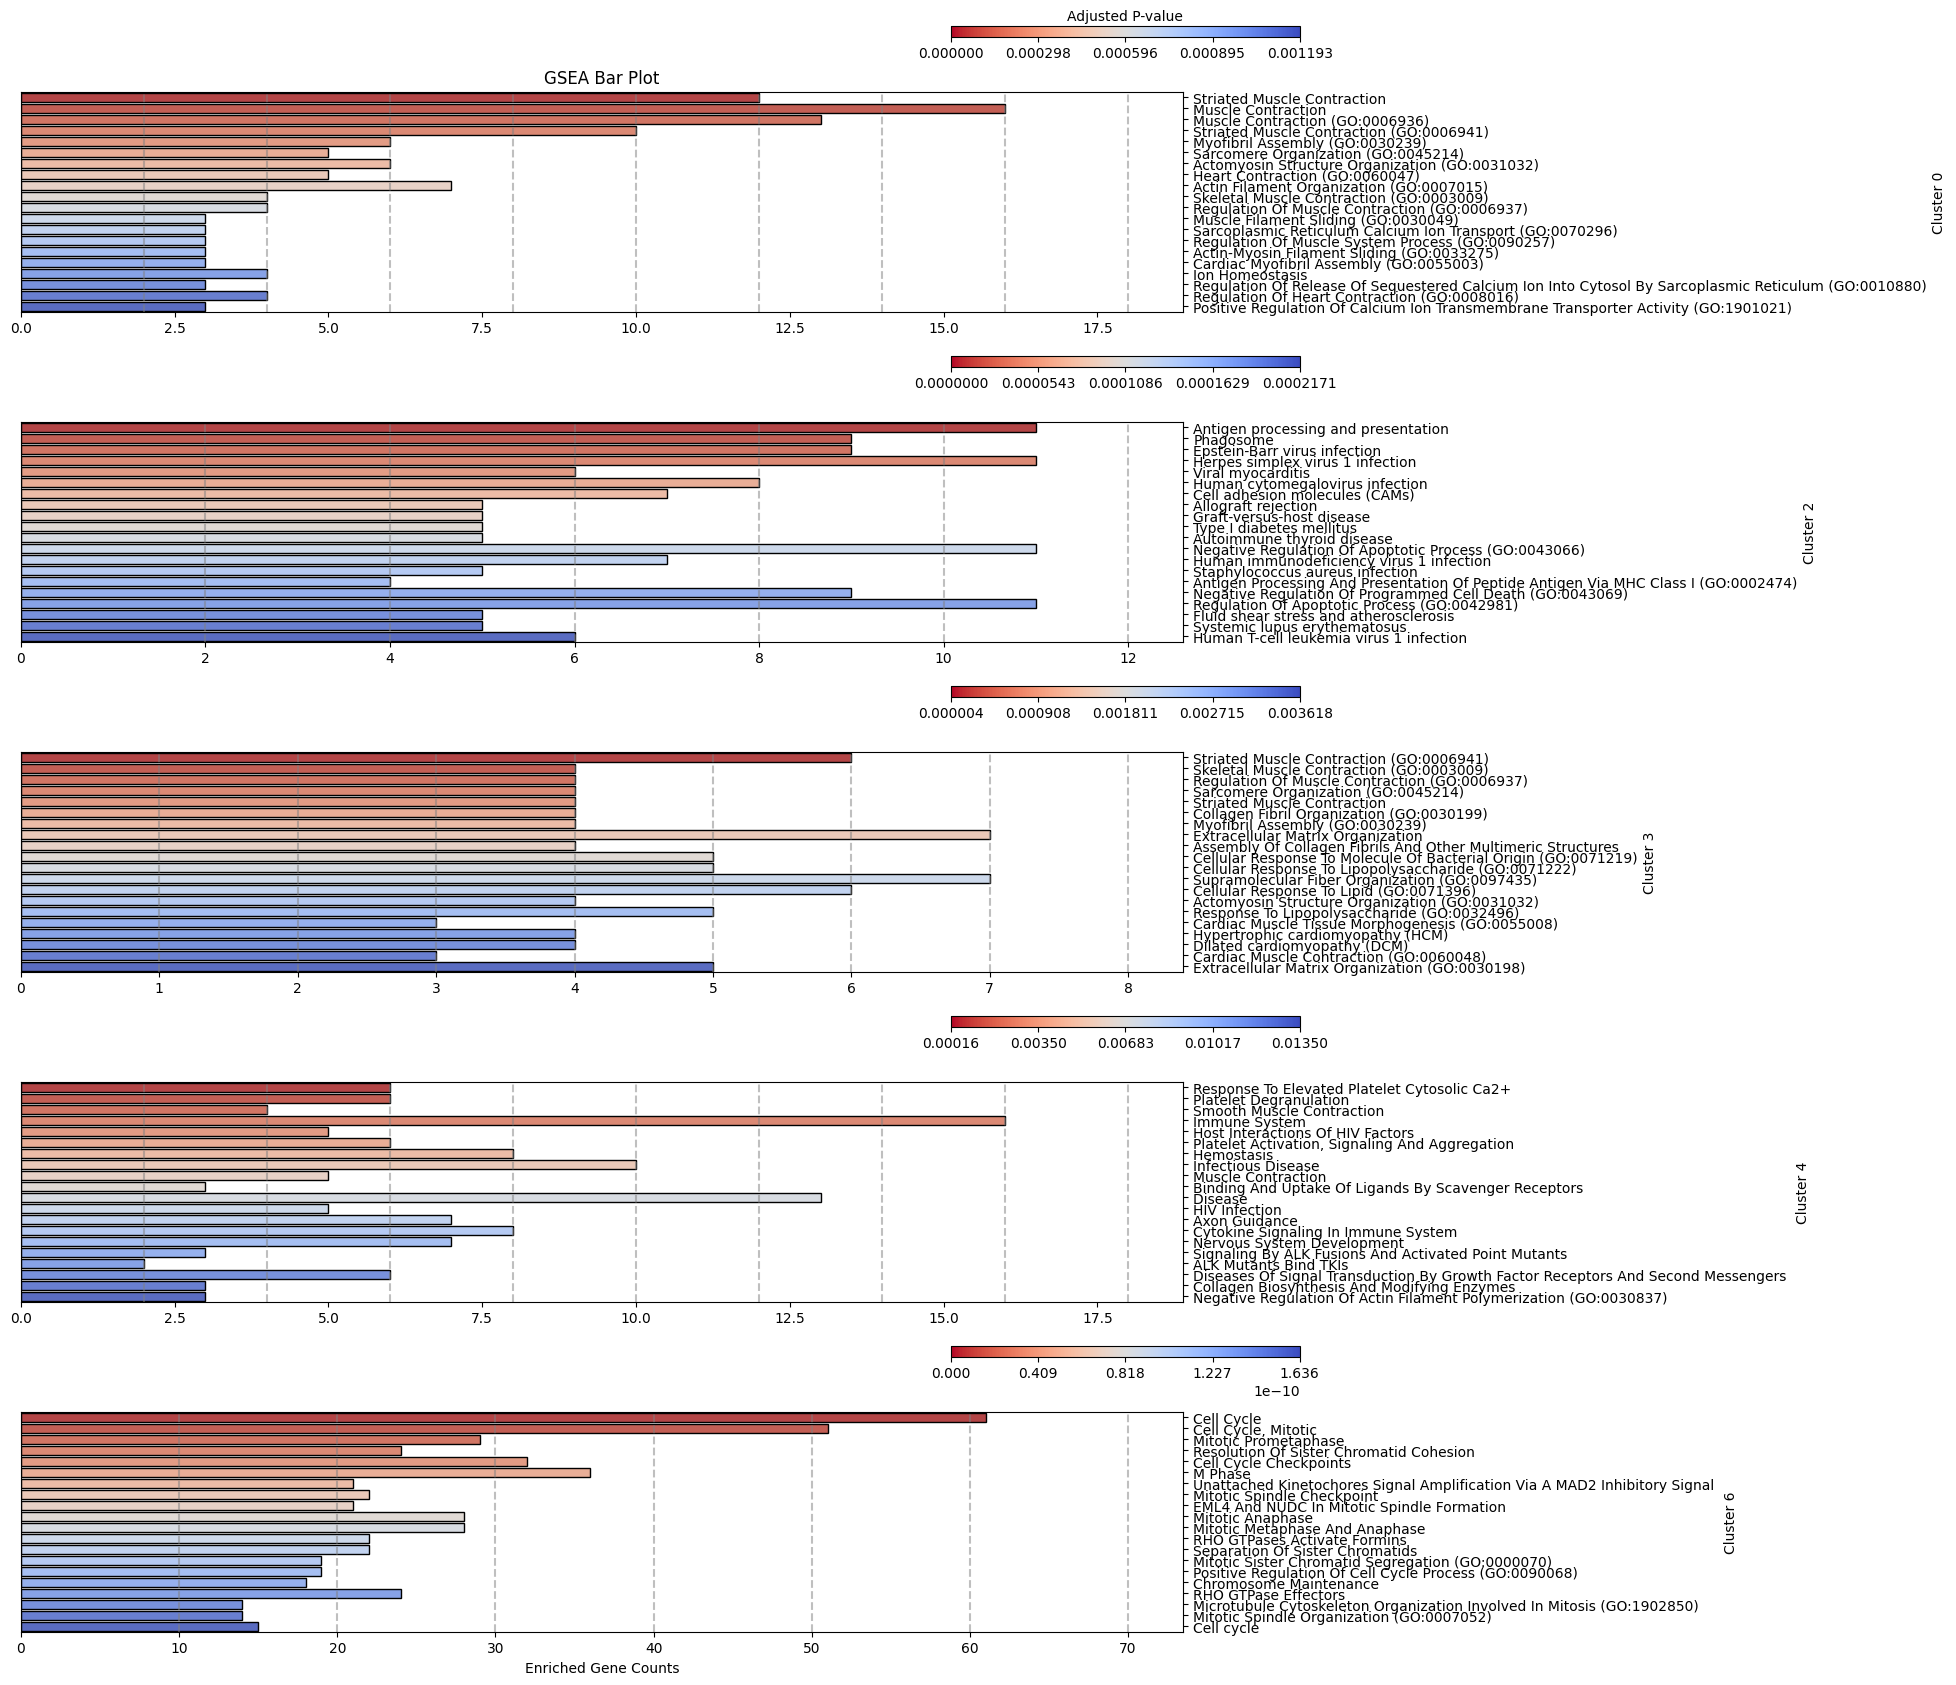

In [7]:
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots(5, 1, figsize=(15, 20))
for idx, cluster in enumerate([0, 2, 3, 4, 6]):
    gsea_results = go_df[go_df["Cluster"] == cluster][:20]

    barplot = sns.barplot(
        x='Gene Counts', 
        y='Term', 
        data=gsea_results, 
        palette="coolwarm_r",
        edgecolor='black',
        ax=ax[idx]
    )
    for tick in ax[idx].get_xticks():
        ax[idx].axvline(x=tick, linestyle='--', color='gray', alpha=0.5)

    norm = plt.Normalize(gsea_results['Adjusted P-value'].min(), gsea_results['Adjusted P-value'].max())
    sm = plt.cm.ScalarMappable(cmap="coolwarm_r", norm=norm)
    sm.set_array([])
    cax = inset_axes(ax[idx], width="30%", height="5%", loc='upper right',
                     bbox_to_anchor=(0.1, 0.3, 1, 1), bbox_transform=ax[idx].transAxes, borderpad=0)
    if idx == 0:
        cbar = fig.colorbar(sm, cax=cax, label="Adjusted P-value", orientation='horizontal', shrink=0.1)
        cbar.ax.xaxis.set_label_position('top')
    else: cbar = fig.colorbar(sm, cax=cax, orientation='horizontal', shrink=0.1)

    cbar_ticks = np.linspace(gsea_results['Adjusted P-value'].min(), gsea_results['Adjusted P-value'].max(), num=5)  # Adjust num for density
    cbar.set_ticks(cbar_ticks)
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))

    ax[idx].yaxis.tick_right()
    ax[idx].yaxis.set_label_position('right')

    ax[idx].set_xlabel('')
    ax[idx].set_ylabel(f'Cluster {cluster}')

plt.subplots_adjust(hspace=0.5)
ax[0].set_title('GSEA Bar Plot')
ax[4].set_xlabel('Enriched Gene Counts')
plt.show()
